The ODE for the Hopf bifurcation normal form:

\begin{align} 
\frac{du_1}{dt} = \beta u_1 - u_2 + \sigma u_1 ( u_1^2 + u_2^2 ) \\
\frac{du_2}{dt} = u_1 + \beta u_2 + \sigma u_2 ( u_1^2 + u_2^2 )

\end{align}

which for σ=−1 (a supercritical Hopf bifurcation)

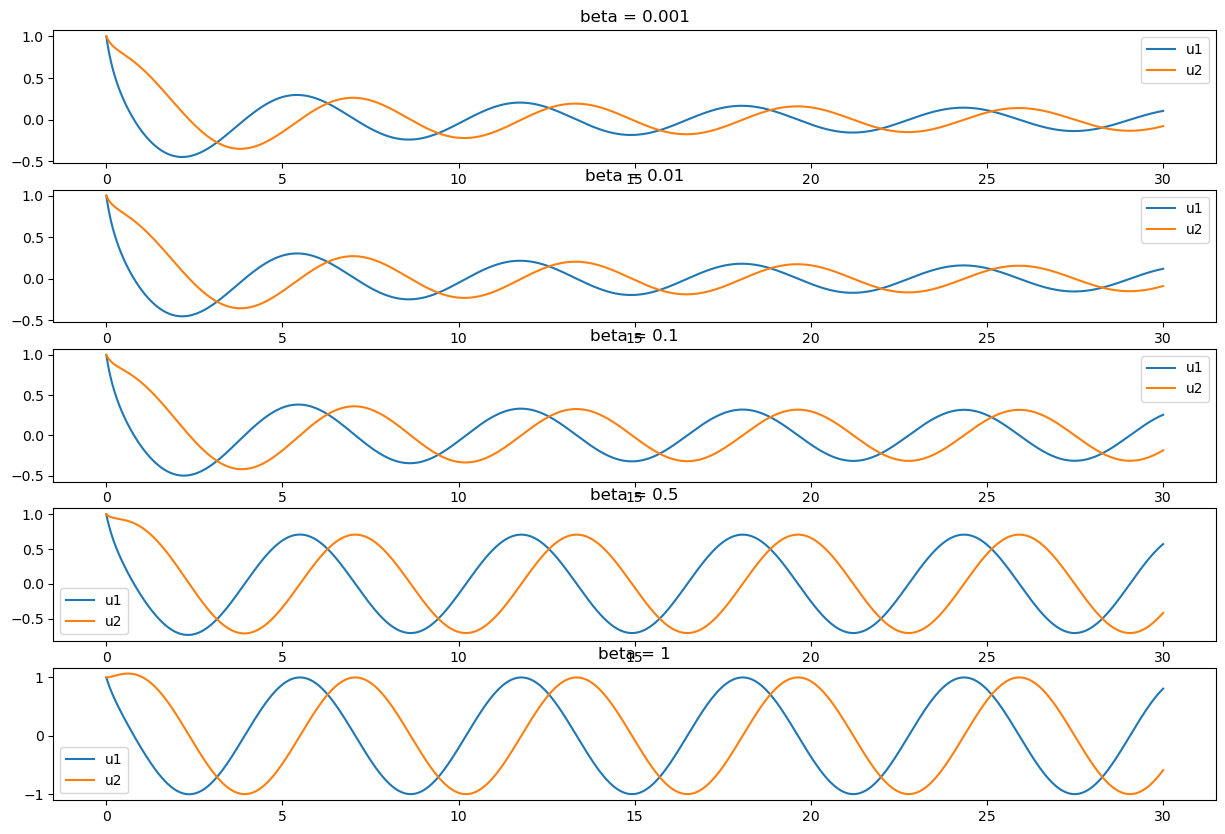

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Helpers.solvers import solve_to, shooting

def ODE(t, y, beta, sigma):
    u1 = y[0]
    u2 = y[1]
    du1dt = beta*u1 - u2 + sigma*u1*(u1**2 + u2**2)
    du2dt = u1 + beta*u2 + sigma*u2*(u1**2 + u2**2)
    return np.array([du1dt, du2dt])

t0 = 0
tf = 30
y0 = np.array([1, 1])
sigma = -1
betas = [0.001, 0.01, 0.1, 0.5, 1]

solutions = []
t_solutions = []

for beta in betas:
    args = (beta, sigma)
    t, y = solve_to(ODE, t0, y0, tf=tf, method='RK4', args=args)

    solutions.append(y)
    t_solutions.append(t)

fig, ax = plt.subplots(len(betas), 1, figsize=(15, 10))

for i in range(len(betas)):
    ax[i].plot(t_solutions[i], solutions[i][:, 0], label='u1')
    ax[i].plot(t_solutions[i], solutions[i][:, 1], label='u2')
    ax[i].set_title('beta = {}'.format(betas[i]))
    ax[i].legend()

plt.show()

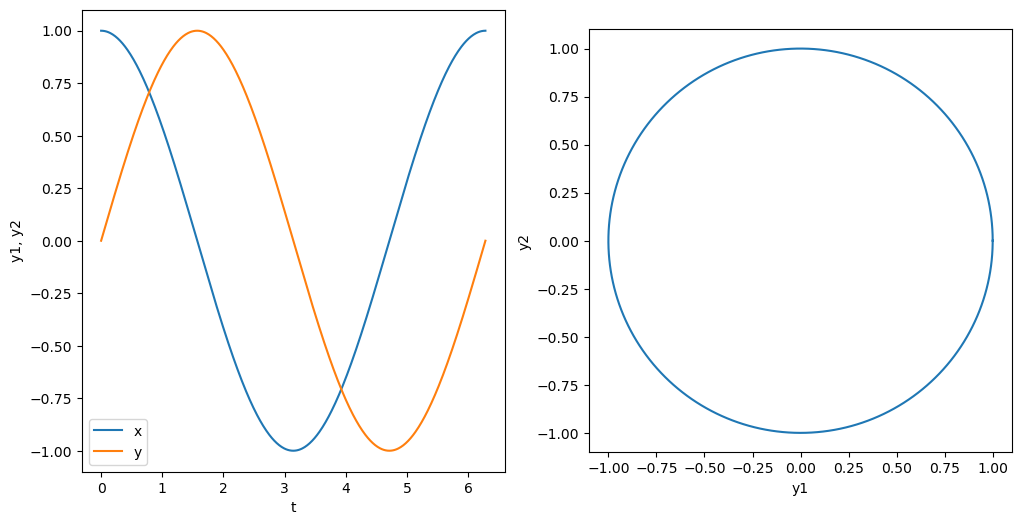

In [12]:
from Helpers.plotting import plot_phase_plane_2D

def ODE(t, y, beta=1, sigma=-1):
    u1 = y[0]
    u2 = y[1]
    du1dt = beta*u1 - u2 + sigma*u1*(u1**2 + u2**2)
    du2dt = u1 + beta*u2 + sigma*u2*(u1**2 + u2**2)
    return np.array([du1dt, du2dt])

def phase_function(t, y):
    return ODE(t, y, beta=1, sigma=-1)[0]


u0 = np.array([1, 0, 7])

X0, T = shooting(u0, ODE, phase_function)
t, y = solve_to(ODE, 0, X0, tf=T, method='RK4')

plot_phase_plane_2D(t, y)

\begin{align}
u_1(t) = \sqrt{\beta \cos (t + \theta)} \\
u_2(t) = \sqrt{\beta \sin (t + \theta)}
\end{align}

where $\theta$ the phase shift.


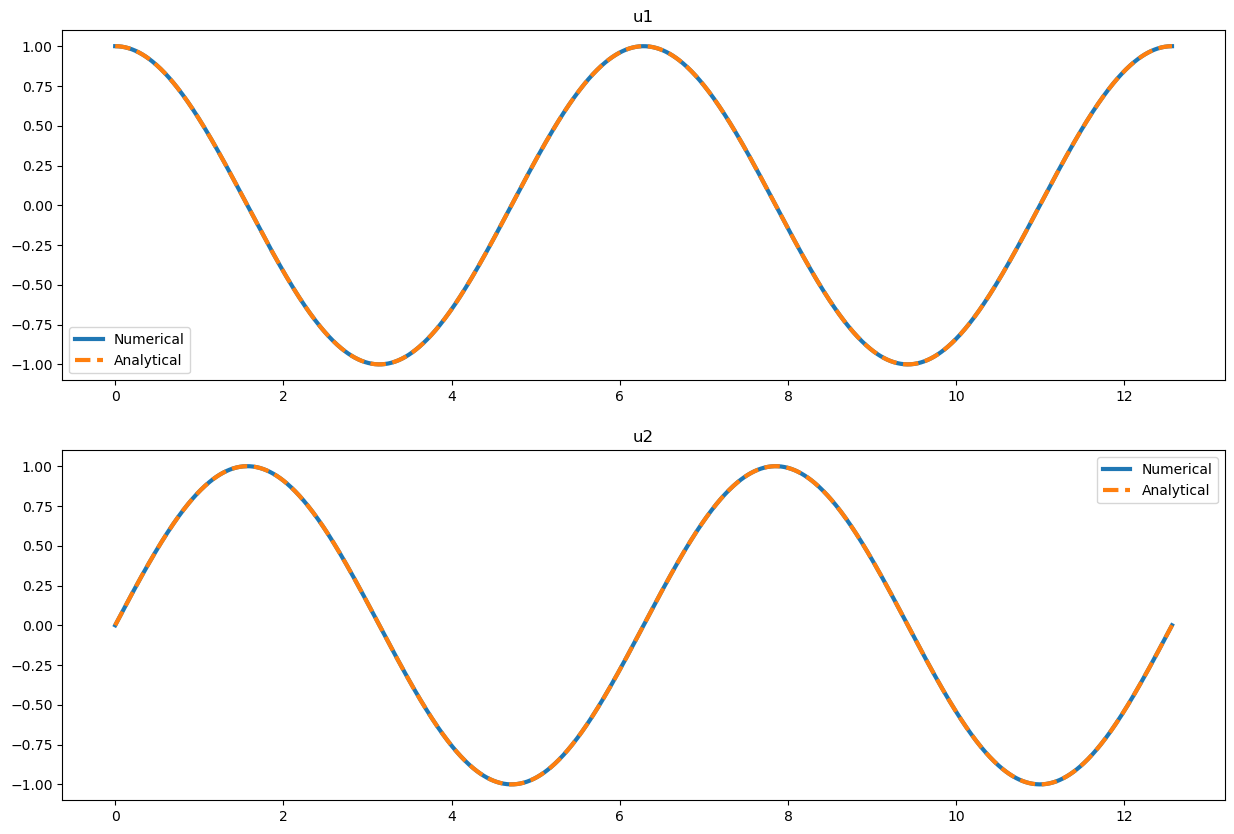

In [13]:

import numpy as np
import matplotlib.pyplot as plt

theta = T
t, y = solve_to(ODE, 0, X0, tf=T*2, method='RK4')

u1_a = np.sqrt(beta)*np.cos(t + theta)
u2_a = np.sqrt(beta)*np.sin(t + theta)

u1_num = y[:, 0]
u2_num = y[:, 1]

# Plot the solutions for u1 and u2
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].plot(t, u1_num, '-', label='Numerical', linewidth=3)
ax[0].plot(t, u1_a, '--', label='Analytical', linewidth=3)
ax[0].set_title('u1')
ax[0].legend()

ax[1].plot(t, u2_num, '-', label='Numerical', linewidth=3)
ax[1].plot(t, u2_a, '--', label='Analytical', linewidth=3)
ax[1].set_title('u2')
ax[1].legend()

plt.show()